# Homework 2: Augmented Reality with Planar Homographies

#### **For each question please refer to the handout for more details.**

Programming questions begin at **Q2**. **Remember to run all cells** and save the notebook to your local machine as a pdf for gradescope submission.

# Collaborators
**List your collaborators for all questions here**:


---

# Q1 Preliminaries

## Q1.1 The Direct Linear Transform


### Q1.1.1 (3 points)

How many degrees of freedom does **h** have?

---

H has 8 degrees of freedom

---

### Q1.1.2 (2 points)

How many point pairs are required to solve **h**?

---

4 points giving us 8 equations in total

---

### Q1.1.3 (5 points)

Derive $\textbf{A}_i$

---
We are working with two sets of corresponding points, $ x_1 $ and $ x_2 $, taken from two images captured by different cameras. The relation between these two sets of points is governed by a homography matrix $ H $, a $3 \times 3$ transformation matrix. The points $ x_1 $ and $ x_2 $ are in homogeneous coordinates.

Given that:
$$
x_1 \equiv H x_2
$$
where each $ x_1 \in \mathbb{R}^3 $, and $ H $ is a $ 3 \times 3 $ matrix, we aim to derive the matrix $ A_i $ such that:
$$
A_i h = 0
$$
holds for each point pair, where $ h $ is the vector containing the elements of matrix $ H $.

We can express the homogeneous coordinates and the transformation in matrix form as:
$$
\begin{pmatrix}
x_i^{(1)} \\
y_i^{(1)} \\
1
\end{pmatrix}
=
\begin{pmatrix}
h_{11} & h_{12} & h_{13} \\
h_{21} & h_{22} & h_{23} \\
h_{31} & h_{32} & h_{33}
\end{pmatrix}
\begin{pmatrix}
x_i^{(2)} \\
y_i^{(2)} \\
1
\end{pmatrix}
$$

Let $ H = \begin{pmatrix} h_1^\top \\ h_2^\top \\ h_3^\top \end{pmatrix} $. We can now break this equation into two scalar equations for $ x_i^{(1)} $ and $ y_i^{(1)} $ as:
$$
x_i^{(1)} = \frac{h_1^T \mathbf{x_i^{(2)}}}{h_3^T \mathbf{x_i^{(2)}}}
$$
$$
y_i^{(1)} = \frac{h_2^T \mathbf{x_i^{(2)}}}{h_3^T \mathbf{x_i^{(2)}}}
$$

Rearranging these equations gives:
$$
x_i^{(1)} \cdot h_3^T \mathbf{x_i^{(2)}} - h_1^T \mathbf{x_i^{(2)}} = 0
$$
$$
y_i^{(1)} \cdot h_3^T \mathbf{x_i^{(2)}} - h_2^T \mathbf{x_i^{(2)}} = 0
$$

These two equations represent constraints on the elements of $ H $ for each point pair. To linearize these constraints, we stack them into the matrix equation:
$$
\begin{pmatrix}
-\mathbf{x}_i^{(2)} & \mathbf{0} & x_i^{(1)}\mathbf{x}_i^{(2)} \\
\mathbf{0} & -\mathbf{x}_i^{(2)} & y_i^{(1)}\mathbf{x}_i^{(2)}
\end{pmatrix}
\begin{pmatrix}
h_1 \\
h_2 \\
h_3
\end{pmatrix}
=
\mathbf{0}
$$

Expanding this matrix gives:
$$
\begin{pmatrix}
-x_i^{(2)} & -y_i^{(2)} & -1 & 0 & 0 & 0 &  x_i^{(1)} x_i^{(2)} &  x_i^{(1)} y_i^{(2)} & 1 \\
0 & 0 & 0 & -x_i^{(2)} & -y_i^{(2)} & -1 &  y_i^{(1)} x_i^{(2)} &  y_i^{(1)} y_i^{(2)} & 1
\end{pmatrix}
\begin{pmatrix}
h_{11} \\
h_{12} \\
h_{13} \\
h_{21} \\
h_{22} \\
h_{23} \\
h_{31} \\
h_{32} \\
h_{33}
\end{pmatrix}
=
\mathbf{0}
$$

Thus, the matrix $ A_i $ for the Direct Linear Transform (DLT) is:
$$
A_i = \begin{pmatrix}
-x_i^{(2)} & -y_i^{(2)} & -1 & 0 & 0 & 0 &  x_i^{(1)} x_i^{(2)} &  x_i^{(1)} y_i^{(2)} & 1 \\
0 & 0 & 0 & -x_i^{(2)} & -y_i^{(2)} & -1 &  y_i^{(1)} x_i^{(2)} &  y_i^{(1)} y_i^{(2)} & 1
\end{pmatrix}
$$
---

### Q1.1.4 (5 points)

What will be the trivial solution for **h**? Is the matrix **A** full rank? Why/Why not? What impact will it have on the singular values (i.e. eigenvalues of $\textbf{A}^T\textbf{A}$)?

---

A is 8X9 matrix. It is not full rank since h is the solution in the null space of A since we find the eigenvector with zero(least) eigen value such that Ah = $\lambda$ h = 0 . A is not full rank since If A is full rank then null space is $\phi$ then only trivial solution is possible i.e. $h=0_{3X3}$ since all singular values are non zero.

---

## Q1.2 Homography Theory Questions

### Q1.2.1 (5 points)

Prove that there exists a homography **H** that satisfies $\textbf{x}_1 ≡ \textbf{Hx}_2$, given two cameras separated by a pure rotation.

---

We want to prove that there exists a homography matrix $H$ such that:

$$
x_2 = H x_1
$$

Let the homography matrix $H$ be:

$$
H = K_2 R K_1^{-1}
$$

We start by substituting the expression for $x_1$ and $x_2$:

$$
x_1 = K_1 \begin{bmatrix} I & 0 \end{bmatrix} X
$$

and

$$
x_2 = K_2 \begin{bmatrix} R & 0 \end{bmatrix} X
$$

Now, we multiply $x_2$ by the homography $H$:

$$
H x_1 = K_2 R K_1^{-1} x_1
$$

Substitute the expression for $x_2$:

$$
H x_1 = K_2 R K_1^{-1} \left( K_1 \begin{bmatrix} I & 0 \end{bmatrix} X \right)
$$

By simplifying the right-hand side, we get:

$$
H x_1 = K_2  \begin{bmatrix} R & 0 \end{bmatrix} X
$$

This matches the original equation for $x_1$, thus proving that:

$$
x_2 = H x_1
$$


---

### Q1.2.2 (5 points):

Show that $\textbf{H}^2$ is the homography corresponding to a rotation of 2$\theta$.

---

Since the intrinsic parameters are the same on one rotation by $\theta$ to get rotation R. $ x_2 = K_1 \begin{bmatrix} R & 0 \end{bmatrix} X $ and $x_1 = K_1 \begin{bmatrix} I & 0 \end{bmatrix} X $

From this the homography matrix is:

$$
H = K_1 R K_1^{-1}
$$

i.e $ x_2 = H x_1$

For again rotation by $\theta$ to reapply R to get a total rotation of 2 $ \theta $. we get
$$
x_3 = Hx_2 = HH x_1 = H^2 x_1
$$ 
Hence the new homography matrix for 2 $ \theta $ rotation is $ H^2$.


---

# Initialization

Run the following code to import the modules you'll need.

In [155]:
import os
import numpy as np
import cv2
import skimage.color
import pickle
from matplotlib import pyplot as plt
import scipy
from skimage.util import montage
import time

PATCHWIDTH = 9

def read_pickle(path):
    with open(path, "rb") as f:
        return pickle.load(f)

def write_pickle(path, data):
    with open(path, "wb") as f:
        pickle.dump(data, f)

def briefMatch(desc1,desc2,ratio):

    matches = skimage.feature.match_descriptors(desc1,desc2,
                                                'hamming',
                                                cross_check=True,
                                                max_ratio=ratio)
    print("shape of matches", matches.shape)
    return matches

def plotMatches(img1,img2,matches,locs1,locs2):

    fig, ax = plt.subplots(nrows=1, ncols=1)
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    plt.axis('off')
    skimage.feature.plot_matches(ax,img1,img2,locs1,locs2,
                                 matches,matches_color='r',only_matches=True)
    plt.show()
    return

def makeTestPattern(patchWidth, nbits):

    np.random.seed(0)
    compareX = patchWidth*patchWidth * np.random.random((nbits,1))
    compareX = np.floor(compareX).astype(int)
    np.random.seed(1)
    compareY = patchWidth*patchWidth * np.random.random((nbits,1))
    compareY = np.floor(compareY).astype(int)

    return (compareX, compareY)

def computePixel(img, idx1, idx2, width, center):

    halfWidth = width // 2
    col1 = idx1 % width - halfWidth
    row1 = idx1 // width - halfWidth
    col2 = idx2 % width - halfWidth
    row2 = idx2 // width - halfWidth
    return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0

def computeBrief(img, locs):

    patchWidth = 9
    nbits = 256
    compareX, compareY = makeTestPattern(patchWidth,nbits)
    m, n = img.shape

    halfWidth = patchWidth//2

    locs = np.array(list(filter(lambda x: halfWidth <= x[0] < m-halfWidth and halfWidth <= x[1] < n-halfWidth, locs)))
    desc = np.array([list(map(lambda x: computePixel(img, x[0], x[1], patchWidth, c), zip(compareX, compareY))) for c in locs])

    return desc, locs

def corner_detection(img, sigma):

    # fast method
    result_img = skimage.feature.corner_fast(img, n=PATCHWIDTH, threshold=sigma)
    locs = skimage.feature.corner_peaks(result_img, min_distance=1)
    return locs

def loadVid(path):

    # Create a VideoCapture object and read from input file
    # If the input is the camera, pass 0 instead of the video file name

    cap = cv2.VideoCapture(path)

    # get fps, width, and height
    fps = cap.get(cv2.CAP_PROP_FPS)
    width  = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
    height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)

    # Append frames to list
    frames = []

    # Check if camera opened successfully
    if cap.isOpened()== False:
        print("Error opening video stream or file")

    # Read until video is completed
    while(cap.isOpened()):

        # Capture frame-by-frame
        ret, frame = cap.read()

        if ret:
            #Store the resulting frame
            frames.append(frame)
        else:
            break

    # When everything done, release the video capture object
    cap.release()
    frames = np.stack(frames)

    return frames, fps, width, height

# Download data

Download the required data and setup the results directory. If running on colab, DATA_PARENT_DIR must be <br> DATA_PARENT_DIR = '/content/' <br> <br> Otherwise, use the local directory of your choosing. Data will be downloaded to DATA_PARENT_DIR/hw3_data and a subdirectory DATA_PARENT_DIR/results will be created.

In [39]:
# Only change this if you are running locally
# Default on colab: DATA_PARENT_DIR = '/content/'

# Data will be downloaded to DATA_PARENT_DIR/hw3_data
# A subdirectory DATA_PARENT_DIR/results will be created

DATA_PARENT_DIR = './content/'

if not os.path.exists(DATA_PARENT_DIR):
  raise RuntimeError('DATA_PARENT_DIR does not exist: ', DATA_PARENT_DIR)

RES_DIR = os.path.join(DATA_PARENT_DIR, 'results')
if not os.path.exists(RES_DIR):
  os.mkdir(RES_DIR)
  print('made directory: ', RES_DIR)


#paths different files are saved to
# OPTIONAL:
# feel free to change if funning locally
ROT_MATCHES_PATH = os.path.join(RES_DIR, 'brief_rot_test.pkl')
ROT_INV_MATCHES_PATH = os.path.join(RES_DIR, 'ec_brief_rot_inv_test.pkl')
AR_VID_FRAMES_PATH = os.path.join(RES_DIR, 'q_3_1_frames.npy')
AR_VID_FRAMES_EC_PATH = os.path.join(RES_DIR, 'q_3_2_frames.npy')

HW3_SUBDIR = 'hw3_data'
DATA_DIR = os.path.join(DATA_PARENT_DIR, HW3_SUBDIR)
ZIP_PATH = DATA_DIR + '.zip'
if not os.path.exists(DATA_DIR):
  !wget 'https://www.andrew.cmu.edu/user/hfreeman/data/16720_spring/hw3_data.zip' -O $ZIP_PATH
  !unzip -qq $ZIP_PATH -d $DATA_PARENT_DIR

# Q2 Computing Planar Homographies

## Q2.1 Feature Detection and Matching

### Q2.1.1 (5 points):

How is the FAST detector different from the Harris corner detector that you've seen in the lectures? Can you comment on its computation performance compared to the Harris corner detector?

---
FAST (Features from Accelerated Segment Test) uses a circle of 16 pixels around a central pixel and classifies a corner if a certain number of surrounding pixels are significantly brighter or darker than the center. FAST optimizes speed by first checking four key points and skipping further checks if these points don’t indicate a corner, making it much faster than traditional methods like Harris, which rely on more computationally intensive operations.

The Harris Corner Detector computes image gradients to form a structure tensor, whose eigenvalues indicate whether a pixel is a corner, an edge, or a flat region. Instead of directly computing eigenvalues, it uses a corner response function based on the determinant and trace of the matrix. 
$ R(x,y) = \text{det}(M(x,y)) - k \cdot (\text{trace}(M(x,y)))^2$ where $M(x,y)$ is the matrix of second moment computed at a patch at a given pixel location $(x,y)$. Pixels with strong corner responses are selected after thresholding and non-maximum suppression. Though computationally heavier than other methods, it is highly accurate for corner detection in computer vision tasks.

Since FAST has an early exit based on just 4 comparisons of intensity value, it is much faster compared to Harris.

---

### Q2.1.2 (5 points):

How is the BRIEF descriptor different from the filterbanks you've seen in the lectures? Could you use any one of the those filter banks as a descriptor?

---

The BRIEF descriptor generates descriptions at keypoints in an image by comparing pixel intensities within a patch around each keypoint. After detecting keypoints using algorithms like FAST or Harris, BRIEF performs random pixel pair intensity comparisons within the patch, generating a binary string (descriptor) based on the results. This process effectively encodes the template of the patch into a string of 1s and 0s. This descriptor is compact and can be matched quickly using Hamming distance.

Filter banks that we used describe the patch interms of generic functions that compute the rate change and direction of patterns in a given image primarily. If we considered each operation as a basis function, the set of image patches that would get a unique descriptor with sufficient seperation in the representation space is limited since we are working with a finite set of filter banks. In case of BRIEF each possible patch gets its template encoded in bindary and can be controlled by the number of random comparisons that we wish to perform.


Yes we could use the LoG DoGx and DoGy filters here since keypoints are corners, these would capture the intensity and direction of the edges of the corners involved. The Gaussian filter would allow us to distinguish based on color. Note that the filter size should be kept sufficiently large and the patches might need to be locally normalised for this to be applicable since these are images taken from 2 different views that we are working with. 

---

### Q2.1.3 (5 points):

Describe how the Hamming distance and Nearest Neighbor can be used to match interest points with BRIEF descriptors. What benefits does the Hamming distance have over a more conventional Euclidean distance measure in our setting?

---

Given a descriptor for each keypoint location, we can find the nearest neighbour using a distance function. Generally the distance function should be the one corresponding to the space in which the decriptors lie. Since for a BRIEF descriptor lies in the space fo strings $\{ 0,1 \}^{N}$ Hamming is a natural distance function that we can use. We could still use L1 euclidean distance but that would give us the same a hamming distance. For $L_p$ distance function is just $( \text{Hamm}(s_1, s_2) )^{1/p}$. Since there is a monotonic relationship between hamming and euclidean distance, any ranking or nearest neighbour comparison should not be affected but still hamming should be preferred since the distance function tells us how many bits we are off.

We can match a point $p$ to its nearest neighbour in a set $S$ as:

$$

p_{\text{nearest}} = \arg \min_{s\in S} \text{Hamm}(\text{BRIEF}(s), \text{BRIEF}(p))
$$

---

### Q2.1.4 (10 points):

#### Implement the function matchPics()

In [69]:
def matchPics(I1, I2, ratio, sigma):
    """
    Match features across images

    Input
    -----
    I1, I2: Source images (RGB or Grayscale uint8)
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector

    Returns
    -------
    matches: List of indices of matched features across I1, I2 [p x 2]
    locs1, locs2: Pixel coordinates of matches [N x 2]
    """

    # ===== your code here! =====

    # TODO: Convert images to GrayScale
    # convert I1 and I2 to numpy arrays
    # Convert images to numpy arrays and uint8 format
    # Convert images to numpy arrays and uint8 format
    # Debugging - Check image shapes and types
    
    # Check if images are in RGB format, and convert to grayscale if necessary
    if len(I1.shape) == 3 and I1.shape[2] == 3:
        I1 = skimage.color.rgb2gray(I1)
    if len(I2.shape) == 3 and I2.shape[2] == 3:
        I2 = skimage.color.rgb2gray(I2)

    # Normalize images to 0.0 - 1.0 range
    I1 = I1 / 255.0
    I2 = I2 / 255.0
    # Detect features in both images
    locs1 = corner_detection(I1, sigma)
    locs2 = corner_detection(I2, sigma)

    # Obtain descriptors for the computed feature locations
    desc1, locs1 = computeBrief(I1, locs1)
    desc2, locs2 = computeBrief(I2, locs2)

    # Match features using the descriptors
    matches = briefMatch(desc1, desc2, ratio)

    return matches, locs1, locs2

#### Implement the function displayMatched

In [41]:
def displayMatched(I1, I2, ratio, sigma):
    """
    Displays matches between two images

    Input
    -----
    I1, I2: Source images
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    """

    print('Displaying matches for ratio: ', ratio, ' and sigma: ', sigma)

    # ===== your code here! =====
    # TODO: Use matchPics and plotMatches to visualize your results

    matches, locs1, locs2 = matchPics(I1, I2, ratio, sigma)
    plotMatches(I1, I2, matches, locs1, locs2)
    return
    # ==== end of code ====


#### Visualize the matches

Use the cell below to visualize the matches. The resulting figure should look similar (but not necessarily identical) to Figure 2.

Feel free to play around with the images and parameters. Please use the original images when submitting the report.

Figure 2 parameters:

*   image1_name = "cv_cover.jpg"
*   image1_name = "cv_desk.png"
*   ratio = 0.7
*   sigma = 0.15

Displaying matches for ratio:  0.7  and sigma:  0.000588235294117647


/var/folders/43/5971cqb109bfv3wb3b47x9tc0000gn/T/ipykernel_72687/3301853510.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0
/var/folders/43/5971cqb109bfv3wb3b47x9tc0000gn/T/ipykernel_72687/3301853510.py:35: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  skimage.feature.plot_matches(ax,img1,img2,locs1,locs2,


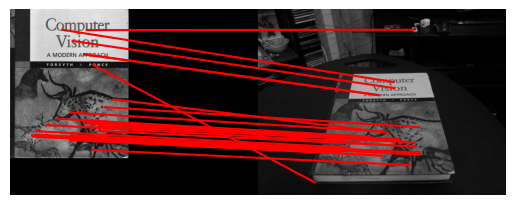

In [70]:
# Feel free to play around with these parameters
# BUT when submitting the report use the original images
image1_name = "cv_cover.jpg"
image2_name = "cv_desk.png"
ratio = 0.7
sigma = 0.15/255.0

image1_path = os.path.join(DATA_DIR, image1_name)
image2_path = os.path.join(DATA_DIR, image2_name)

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#bgr to rgb
if len(image1.shape) == 3 and image1.shape[2] == 3:
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if len(image2.shape) == 3 and image2.shape[2] == 3:
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

displayMatched(image1, image2, ratio, sigma)

### Q2.1.5 (10 points):

Experiment with different sigma and ratio values. Conduct a small ablation study, and include the figures displaying the matched features with various parameters in your write-up. Explain the effect of these two paremeters respectively.

---

Explain the effect of these two parameters: YOUR ANSWER HERE...

---

Displaying matches for ratio:  0.1  and sigma:  0.0003921568627450981


/var/folders/43/5971cqb109bfv3wb3b47x9tc0000gn/T/ipykernel_72687/3301853510.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0
/var/folders/43/5971cqb109bfv3wb3b47x9tc0000gn/T/ipykernel_72687/3301853510.py:35: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  skimage.feature.plot_matches(ax,img1,img2,locs1,locs2,


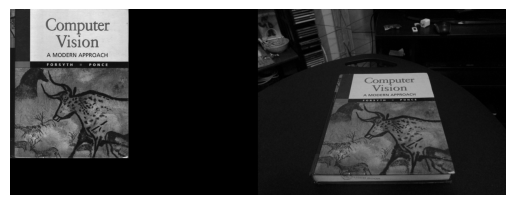

Displaying matches for ratio:  0.33  and sigma:  0.0003921568627450981


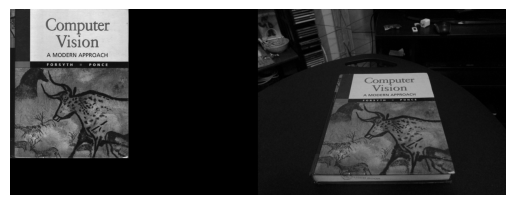

Displaying matches for ratio:  0.67  and sigma:  0.0003921568627450981


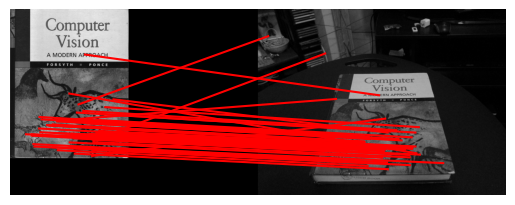

Displaying matches for ratio:  0.99  and sigma:  0.0003921568627450981


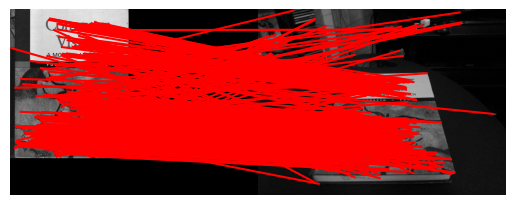

Displaying matches for ratio:  0.1  and sigma:  0.000980392156862745


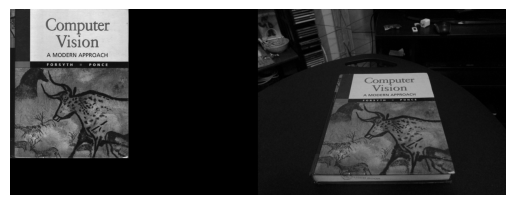

Displaying matches for ratio:  0.33  and sigma:  0.000980392156862745


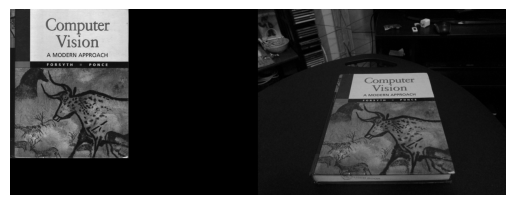

Displaying matches for ratio:  0.67  and sigma:  0.000980392156862745


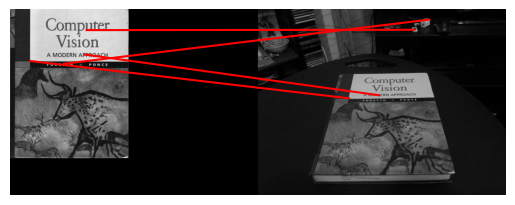

Displaying matches for ratio:  0.99  and sigma:  0.000980392156862745


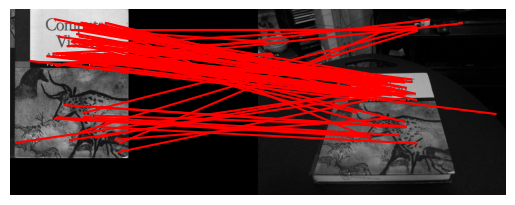

Displaying matches for ratio:  0.1  and sigma:  0.00196078431372549


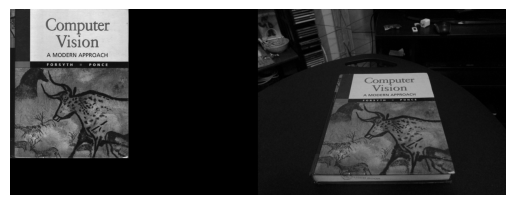

Displaying matches for ratio:  0.33  and sigma:  0.00196078431372549


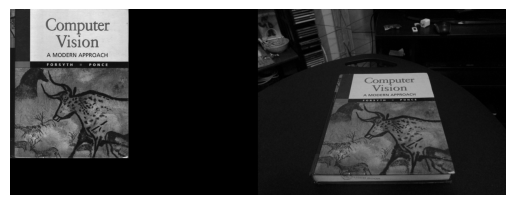

Displaying matches for ratio:  0.67  and sigma:  0.00196078431372549


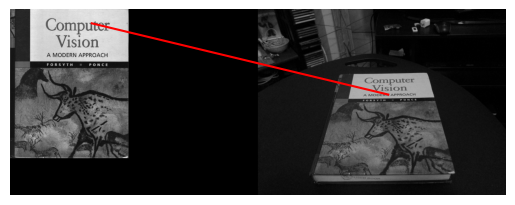

Displaying matches for ratio:  0.99  and sigma:  0.00196078431372549


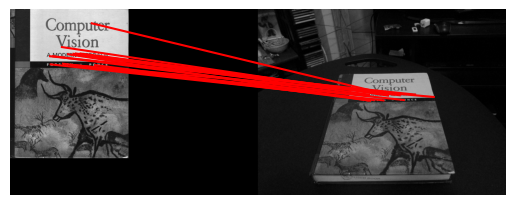

In [72]:
image1_name = "cv_cover.jpg"
image2_name = "cv_desk.png"

image1_path = os.path.join(DATA_DIR, image1_name)
image2_path = os.path.join(DATA_DIR, image2_name)

image1 = cv2.imread(image1_path)
image2 = cv2.imread(image2_path)

#bgr to rgb
if len(image1.shape) == 3 and image1.shape[2] == 3:
  image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

if len(image2.shape) == 3 and image2.shape[2] == 3:
  image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

# ===== your code here! =====
# Experiment with different sigma and ratio values.
# Use displayMatches to visualize.
# Include the matched feature figures in the write-up.

# Display matches for different sigma and ratio values
for sigma_ in [0.1, 0.25, 0.5]:
    for ratio in [0.1, 0.33, 0.67, 0.99]:
        sigma = sigma_ / 255.0
        displayMatched(image1, image2, ratio, sigma)

# ==== end of code ====

### Q2.1.6 (10 points):

#### Implement the function briefRot

In [76]:
def briefRot(min_deg, max_deg, deg_inc, ratio, sigma, filename):
    """
    Tests Brief with rotations.

    Input
    -----
    min_deg: minimum degree to rotate image
    max_deg: maximum degree to rotate image
    deg_inc: number of degrees to increment when iterating
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    filename: filename of image to rotate

    """

    if not os.path.exists(RES_DIR):
      raise RuntimeError('RES_DIR does not exist. did you run all cells?')

    # Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_degrees = [] # stores the degrees of rotation
    match_counts = [] # stores the number of matches at each degree of rotation

    for i in range(min_deg, max_deg, deg_inc):
        print(i)

        # ===== your code here! =====
        # TODO: Rotate Image (Hint: use scipy.ndimage.rotate)

        image_rotated = scipy.ndimage.rotate(image, i, reshape=False)

        # TODO: Match features in images

        matches, locs1, locs2 = matchPics(image, image_rotated, ratio, sigma)

        # TODO: visualizes matches at at least 3 different orientations
        # to include in your report
        # (Hint: use plotMatches)
        plotMatches(image, image_rotated, matches, locs1, locs2)
        match_counts.append(len(matches))
        match_degrees.append(i)
        
        # TODO: Update match_degrees and match_counts (see descriptions above)

        # ==== end of code ====

    # Save to pickle file
    matches_to_save = [match_counts, match_degrees, deg_inc]
    write_pickle(ROT_MATCHES_PATH, matches_to_save)

def dispBriefRotHist(matches_path=ROT_MATCHES_PATH):
    # Check if pickle file exists
    if not os.path.exists(matches_path):
      raise RuntimeError('matches_path does not exist. did you call briefRot?')

    # Read from pickle file
    match_counts, match_degrees, deg_inc = read_pickle(matches_path)

    # Display histogram
    # Bins are centered and separated every 10 degrees
    plt.figure()
    bins = [x - deg_inc/2 for x in match_degrees]
    bins.append(bins[-1] + deg_inc)
    plt.hist(match_degrees, bins=bins, weights=match_counts, log=True)
    #plt.hist(match_degrees, bins=[10 * (x-0.5) for x in range(37)], weights=match_counts, log=True)
    plt.title("Histogram of BREIF matches")
    plt.ylabel("# of matches")
    plt.xlabel("Rotation (deg)")
    plt.tight_layout()

    output_path = os.path.join(RES_DIR, 'histogram.png')
    plt.savefig(output_path)

#### Visualize the matches under rotation

See debugging tips in handout.


0


/var/folders/43/5971cqb109bfv3wb3b47x9tc0000gn/T/ipykernel_72687/3301853510.py:58: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0
/var/folders/43/5971cqb109bfv3wb3b47x9tc0000gn/T/ipykernel_72687/3301853510.py:35: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  skimage.feature.plot_matches(ax,img1,img2,locs1,locs2,


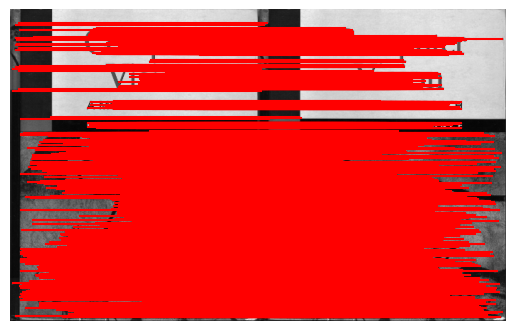

30


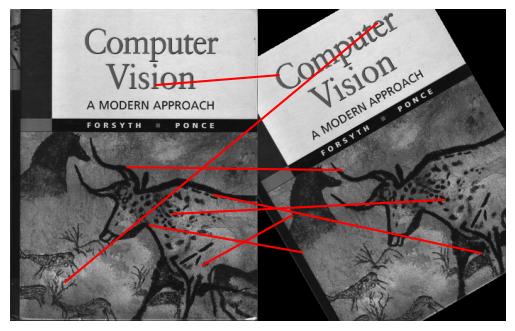

60


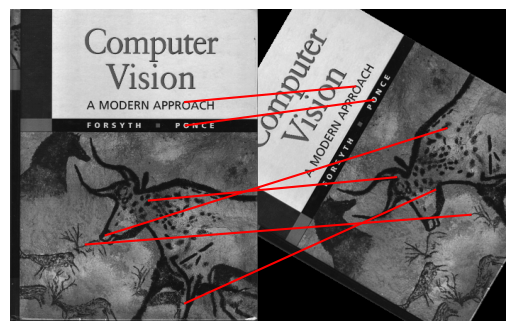

90


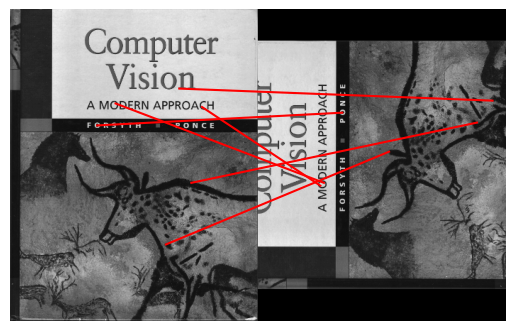

120


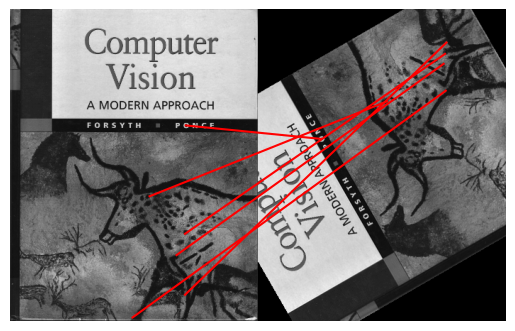

150


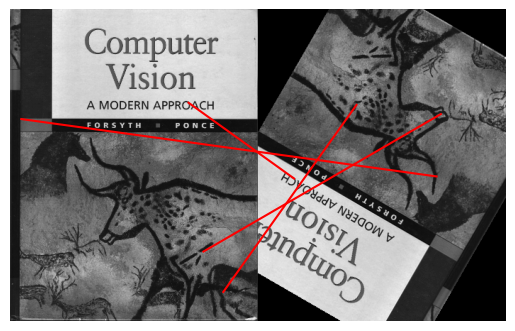

180


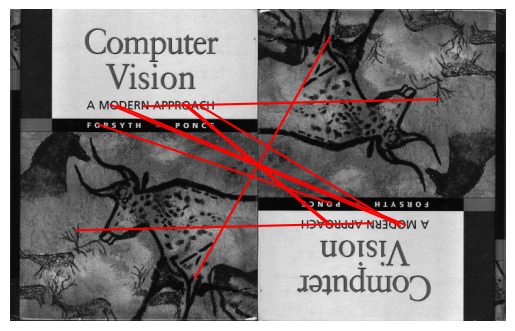

210


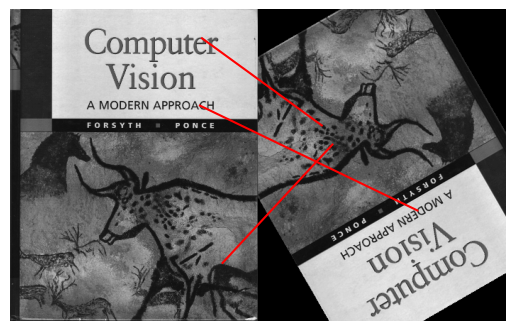

240


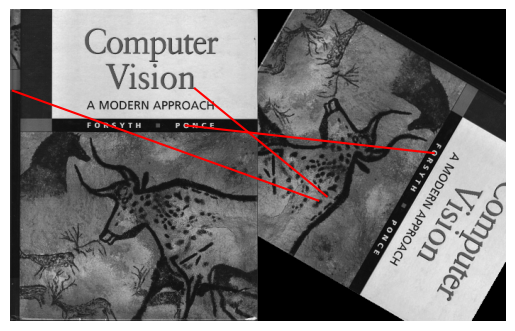

270


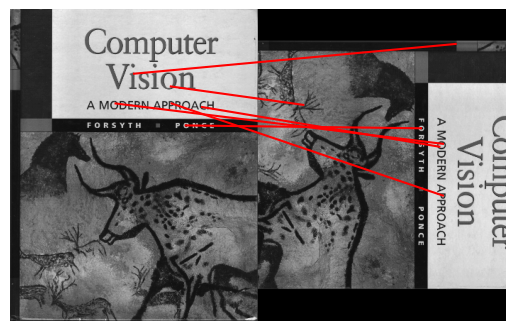

300


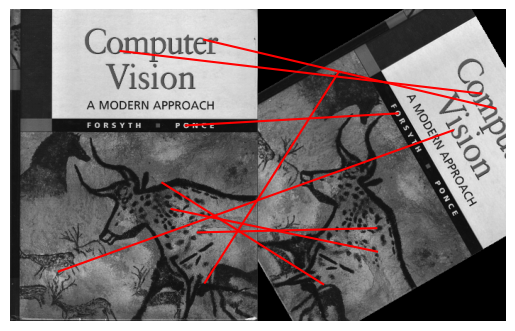

330


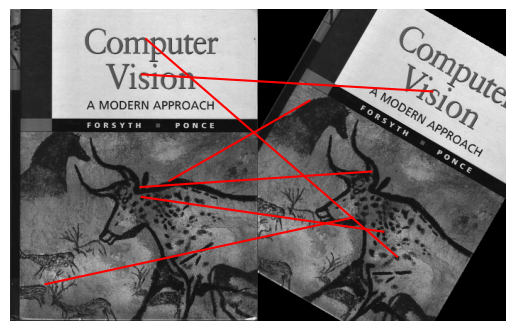

In [77]:
# defaults are:
# min_deg = 0
# max_deg = 360
# deg_inc = 10
# ratio = 0.7
# sigma = 0.15
# filename = 'cv_cover.jpg'

# Controls the rotation degrees
min_deg = 0
max_deg = 360
deg_inc = 30

# Brief feature descriptor and Fast feature detector paremeters
# (change these if you want to use different values)
ratio = 0.7
sigma = 0.1/255.0

# image to rotate and match
# (no need to change this but can if you want to experiment)
filename = 'cv_cover.jpg'

# Call briefRot
briefRot(min_deg, max_deg, deg_inc, ratio, sigma, filename)

#### Plot the histogram

See debugging tips in handout.

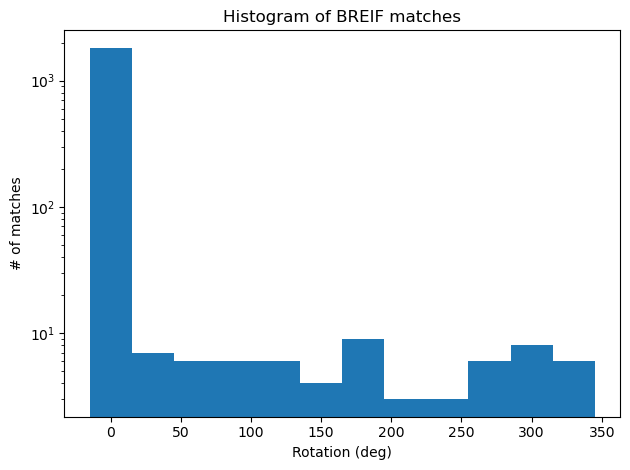

In [78]:
dispBriefRotHist()

---

BRIEF generates a strign description of the oriented template of the patch. on rotating, the patch orientation changes and the corresponding brief descriptor also changes since the indices of comparison have rotated but the decriptors are being generated from the original unrotated location resulting in low similarity.

---

### Q2.1.7.1 (Extra Credit - 5 points):

Design a fix to make BRIEF more rotation invariant. Feel free to make any helper functions as necessary. But you cannot use any additional OpenCV or Scikit-Image functions.

In [ ]:
# ===== your code here! =====
# TODO: Define any helper functions here
# (Feel free to put anything in its own cell)

# TODO: Feel free to modify the inputs and the function body as necessary
# This is only an outline
def briefRotInvEc(min_deg, max_deg, deg_inc, ratio, sigma, filename):
    """
    Rotation invariant Brief.

    Input
    -----
    min_deg: minimum degree to rotate image
    max_deg: maximum degree to rotate image
    deg_inc: number of degrees to increment when iterating
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    filename: filename of image to rotate

    """

    if not os.path.exists(RES_DIR):
      raise RuntimeError('RES_DIR does not exist. did you run all cells?')

    #Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_degrees = [] # stores the degrees of rotation
    match_counts = [] # stores the number of matches at each degree of rotation

    for i in range(min_deg, max_deg, deg_inc):
        print(i)

        # TODO: Rotate Image (Hint: use scipy.ndimage.rotate)

        # TODO: Brief matcher that is rotation invariant
        # Feel free to define additional helper functions as necessary

        # TODO: visualizes matches at at least 3 different orientations
        # to include in your report
        # (Hint: use plotMatches)

        # TODO: Update match_degrees and match_counts (see descriptions above)

    # Save to pickle file
    matches_to_save = [match_counts, match_degrees, deg_inc]
    write_pickle(ROT_INV_MATCHES_PATH, matches_to_save)

# ==== end of code ====

#### Visualize your implemented function


In [ ]:
min_deg = 0
max_deg = 360
deg_inc = 10
filename = 'cv_cover.jpg'

# ===== your code here! =====
# TODO: Call briefRotInvEc and visualize

# ==== end of code ====


#### Plot Histogram

In [ ]:
dispBriefRotHist(matches_path=ROT_INV_MATCHES_PATH)

---

Compare the histograms with an without rotation invariance. Explain your rotation invariant design and how you selected any parameters that you used: YOUR ANSWER HERE...

---

### Q2.1.7.2 (Extra Credit - 5 points):

Design a fix to make BRIEF more scale invariant. Feel free to make any helper functions as necessary. But you cannot use any additional OpenCV or Scikit-Image functions.


In [ ]:
# ===== your code here! =====
# TODO: Define any helper functions here
# (Feel free to put anything in its own cell)

# TODO: Modify the inputs and the function body as necessary
def briefScaleInvEc(ratio, sigma, filename):

    #Read the image and convert bgr to rgb
    image_path = os.path.join(DATA_DIR, filename)
    image = cv2.imread(image_path)
    if len(image.shape) == 3 and image.shape[2] == 3:
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    match_scales = [] # stores the scaling factors
    match_counts = [] # stores the number of matches at each scaling factor

    for i in [1]:
        # Scale Image
        image_scale = cv2.resize(image,(int(image.shape[1]/(2**i)),
                                        int(image.shape[0]/(2**i))),
                                 interpolation = cv2.INTER_AREA)

        # TODO: Brief matcher that is scale invariant
        # Feel free to define additional helper functions as necessary

        # Compare to regular matchPics
        matches_orig, locs1_orig, locs2_orig = matchPics(image,
                                                         image_scale,
                                                         ratio, sigma)

        print('plotting non-scale invariant scale: ', 2**i)
        plotMatches(image, image_scale, matches_orig, locs1_orig,
                    locs2_orig)
        print('plotting scale-invariant: ', 2**i)
        plotMatches(image, image_scale, matches, locs1, locs2)

# ==== end of code ====

#### Visualize your implemented function

In [ ]:
# ===== your code here! =====
# TODO: Call briefScaleInvEc and visualize
# You may change any parameters and the function body as necessary

filename = 'cv_cover.jpg'

ratio = 0.7
sigma = 0.15

briefScaleInvEc(ratio, sigma, filename)
# ==== end of code ====

---

Explain your scale invariant design and how you selected any parameters that you used: YOUR ANSWER HERE...

---


## Q2.2 Homography Computation

### Q2.2.1 (15 Points):

Implement the function computeH

In [436]:
import numpy as np

def computeH(x1, x2):
    """
    Compute the homography between two sets of points.

    Input
    -----
    x1, x2: Nx2 arrays of corresponding points from two images.

    Returns
    -------
    H2to1: 3x3 homography matrix that transforms x2 to x1.
    """

    if x1.shape != x2.shape:
        raise ValueError('The number of points in x1 and x2 must match.')
    
    # Ensure that both x1 and x2 are 2D points
    assert x1.shape[1] == 2 and x2.shape[1] == 2, "Input points must be 2D coordinates."

    # Convert points to homogeneous coordinates if needed
    if x1.shape[1] == 2:
        x1 = np.hstack((x1, np.ones((x1.shape[0], 1))))
    if x2.shape[1] == 2:
        x2 = np.hstack((x2, np.ones((x2.shape[0], 1))))

    # Initialize the matrix A for the system of equations A*h = 0
    A = np.zeros((2 * x1.shape[0], 9))

    # Construct the A matrix using the point correspondences
    for i in range(x1.shape[0]):
        x, y, z = x1[i]
        x_, y_, z_ = x2[i]

        A[2 * i] = [-x_, -y_, -1, 0, 0, 0, x_ * x, y_ * x,  x]
        A[2 * i + 1] = [0, 0, 0, -x_, -y_, -1, x_ * y, y_ * y,  y]

    # Perform SVD (Singular Value Decomposition) on the A matrix
    U, S, VT = np.linalg.svd(A)
    h = VT[-1]  # The last row of V^T (or last column of V) gives the solution

    # Reshape the resulting 9x1 vector into the 3x3 homography matrix
    H2to1 = h.reshape((3, 3))

    # Normalize H so that H[2,2] = 1 (this is optional but standard practice)
    H2to1 = H2to1 / H2to1[2, 2]

    return H2to1

### Q2.2.2 (10 points):

Implement the function computeH_norm

In [339]:
import numpy as np

def computeH_norm(x1, x2):
    """
    Compute the homography between two sets of points using normalization.

    Input
    -----
    x1, x2: Nx2 arrays of corresponding points from two images.

    Returns
    -------
    H2to1: 3x3 homography matrix that best transforms x2 to x1.
    """

    if x1.shape != x2.shape:
        raise ValueError('The number of points in x1 and x2 must match.')
    if x1.shape[0] < 4:
        raise ValueError('At least 4 points are required to compute a homography.')

    # Compute the centroids of the points
    x1_centroid = np.mean(x1, axis=0)
    x2_centroid = np.mean(x2, axis=0)

    # Shift the origin of the points to the centroid
    x1_shifted = x1 - x1_centroid
    x2_shifted = x2 - x2_centroid

    # Compute the mean distance of the points from the origin
    x1_mean_dist = np.mean(np.linalg.norm(x1_shifted, axis=1))
    x2_mean_dist = np.mean(np.linalg.norm(x2_shifted, axis=1))

    # Similarity transform for x1
    T1 = np.array([[np.sqrt(2) / x1_mean_dist, 0, -(np.sqrt(2) / x1_mean_dist) * x1_centroid[0]],
                   [0, np.sqrt(2) / x1_mean_dist, -(np.sqrt(2) / x1_mean_dist) * x1_centroid[1]],
                   [0, 0, 1]])

    # Similarity transform for x2
    T2 = np.array([[np.sqrt(2) / x2_mean_dist, 0, -(np.sqrt(2) / x2_mean_dist) * x2_centroid[0]],
                   [0, np.sqrt(2) / x2_mean_dist, -(np.sqrt(2) / x2_mean_dist) * x2_centroid[1]],
                   [0, 0, 1]])

    # Convert points to homogeneous coordinates
    x1_h = np.hstack((x1, np.ones((x1.shape[0], 1))))
    x2_h = np.hstack((x2, np.ones((x2.shape[0], 1))))

    # Apply the similarity transforms
    x1_normalized = (T1 @ x1_h.T).T
    x2_normalized = (T2 @ x2_h.T).T

    # Compute homography using the normalized points
    H2to1 = computeH(x1_normalized[:, :2], x2_normalized[:, :2])  # Use the first two columns

    # Denormalize the homography
    H2to1 = np.linalg.inv(T1) @ H2to1 @ T2
    H2to1 = H2to1 / H2to1[2, 2]
    return H2to1

### Q2.2.3 (25 points):

Implement RANSAC

In [444]:
import numpy as np
import cv2

def computeH_ransac(locs1, locs2, max_iters=1000, inlier_tol=5.0):
    """
    Estimate the homography between two sets of points using RANSAC.
    
    Parameters:
    -----------
    locs1, locs2: Nx2 arrays of corresponding points (source and destination points).
    max_iters: Number of iterations to run RANSAC.
    inlier_tol: Tolerance value for considering a point to be an inlier.
    
    Returns:
    --------
    bestH2to1: 3x3 homography matrix that best transforms locs2 to locs1.
    best_inliers: Indices of RANSAC inliers.
    """
    
    num_points = locs1.shape[0]
    bestH2to1 = None
    best_inliers = []
    max_inliers = 0
    
    # Convert the points to float32 for OpenCV
    locs1 = locs1.astype(np.float32)
    locs2 = locs2.astype(np.float32)
    
    for i in range(max_iters):
        # Step 1: Randomly sample 4 points to compute the homography
        indices = np.random.choice(num_points, 4, replace=False)
        locs1_sample = locs1[indices]
        locs2_sample = locs2[indices]
        
        # Step 2: Compute the homography matrix using the 4 sample points
        H = computeH_norm(locs1_sample, locs2_sample)  # 0 means use Direct Linear Transform (DLT)
        
        # Step 3: Transform all locs2 points using the computed homography
        locs2_transformed = cv2.perspectiveTransform(np.expand_dims(locs2, axis=1), H)
        locs2_transformed = locs2_transformed.squeeze()  # Remove unnecessary dimensions
        
        # Step 4: Compute the distances between transformed locs2 and locs1
        distances = np.linalg.norm(locs2_transformed - locs1, axis=1)
        
        # Step 5: Determine the inliers (distances less than inlier_tol)
        inliers = np.where(distances < inlier_tol)[0]
        
        # Step 6: Update if this set of inliers is the largest found so far
        if len(inliers) > max_inliers:
            max_inliers = len(inliers)
            best_inliers = inliers
            bestH2to1 = H
    
    return bestH2to1, best_inliers

# Example usage:
# locs1 and locs2 are Nx2 arrays of corresponding points
# max_iters is the number of RANSAC iterations, inlier_tol is the distance tolerance for inliers

### Q2.2.4 (10 points):

#### Implement the function compositeH

In [299]:
def compositeH(H2to1, template, img):
    """
    Returns the composite image.

    Input
    -----
    H2to1: Homography from image to template
    template: template image to be warped
    img: background image

    Returns
    -------
    composite_img: Composite image
    """

    # Ensure homography matrix is float and 3x3
    H2to1 = H2to1.astype(np.float32)  # Convert homography matrix to float if necessary

    # Warp the template image to the image using the homography H2to1
    template_warped = cv2.warpPerspective(template, H2to1, (img.shape[1], img.shape[0]))

    # Create a binary mask where the warped template is not black (non-zero values in all channels)
    mask = np.any(template_warped != 0, axis=-1).astype(np.uint8)  # Shape (height, width), single channel

    # Expand mask to match the image channels
    mask = np.repeat(mask[:, :, np.newaxis], 3, axis=2)  # Shape (height, width, 3)

    # Create a masked version of the background image where the template will be placed
    img_masked = img * (1 - mask)

    # Add the warped template to the background
    composite_img = img_masked + template_warped

    return composite_img

#### Implement the function warpImage

In [449]:
def warpImage(ratio, sigma, max_iters, inlier_tol):
    """
    Warps hp_cover.jpg onto the book cover in cv_desk.png.

    Input
    -----
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    """

    hp_cover = skimage.io.imread(os.path.join(DATA_DIR, 'hp_cover.jpg'))
    cv_cover = skimage.io.imread(os.path.join(DATA_DIR, 'cv_cover.jpg'))
    cv_desk = skimage.io.imread(os.path.join(DATA_DIR, 'cv_desk.png'))
    cv_desk = cv_desk[:, :, :3]

    # ===== your code here! =====
    # if image is greascale convert to rgb
    if len(hp_cover.shape) == 2:
        hp_cover = cv2.cvtColor(hp_cover, cv2.COLOR_GRAY2RGB)
    if len(cv_cover.shape) == 2:
        cv_cover = cv2.cvtColor(cv_cover, cv2.COLOR_GRAY2RGB)
    if len(cv_desk.shape) == 2:
        cv_desk = cv2.cvtColor(cv_desk, cv2.COLOR_GRAY2RGB)
    # TODO: match features between cv_desk and cv_cover using matchPics
    matches, locs1, locs2 = matchPics(cv_desk, cv_cover, ratio, sigma)
    print(" All shapes", matches.shape, locs1.shape, locs2.shape)
    plotMatches(cv_desk, cv_cover, matches, locs1, locs2)

    # TODO: Scale matched pixels in cv_cover to size of hp_cover
    # locs2 = locs2 * (hp_cover.shape[1] / cv_cover.shape[1])

    print('locs2 shape: ', locs2.shape)
    print('locs1 shape: ', locs1.shape)
    print('matches shape: ', matches.shape)
    # TODO: Get homography by RANSAC using computeH_ransac
    
    # get the shape of both the images
    h, w = cv_cover.shape[:2]
    print("shapes of cover", h, w)
    h2, w2 = cv_desk.shape[:2]
    
    # corners of the image

    # corners = np.array([[0, 0], [h-1, 0], [h-1, w-1], [0, w-1]])
    # corners2 = np.array([[200, 200], [500, 150], [490, 590], [180, 500]])

    # swap columns of corners

    # corners = np.array([[0, 0], [0, h-1], [w-1, h-1], [w-1, 0]])
    # corners2 = np.array([[200, 200], [150, 500], [590, 490], [500, 180]])
    # H2to1 = computeH(corners2, corners)
    # H2to1 = H2to1 / H2to1[2, 2]
    # print(H2to1)
    
    # swap columns of locs1 and locs2
    locs1 = locs1[:, ::-1]
    locs2 = locs2[:, ::-1]
    

    H2to1, inliers = computeH_ransac(locs1[matches[:,0]], locs2[matches[:,1]], max_iters, inlier_tol)
    # H2to1, inliers = computeH_ransac(corners2, corners, max_iters, inlier_tol)

    # TODO: Overlay using compositeH to return composite_img
    composite_img = compositeH(H2to1, cv_cover, cv_desk)
    # print(locs2[inliers])
    # plotMatches(cv_desk, cv_cover, inliers, locs1, locs2)
    # ==== end of code ====

    plt.imshow(composite_img)
    plt.show()

#### Visualize composite image

/var/folders/43/5971cqb109bfv3wb3b47x9tc0000gn/T/ipykernel_72687/3702616189.py:59: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return 1 if img[int(center[0]+row1)][int(center[1]+col1)] < img[int(center[0]+row2)][int(center[1]+col2)] else 0


shape of matches (18, 2)
 All shapes (18, 2) (476, 2) (945, 2)


/var/folders/43/5971cqb109bfv3wb3b47x9tc0000gn/T/ipykernel_72687/3702616189.py:36: FutureWarning: `plot_matches` is deprecated since version 0.23 and will be removed in version 0.25. Use `skimage.feature.plot_matched_features` instead.
  skimage.feature.plot_matches(ax,img1,img2,locs1,locs2,


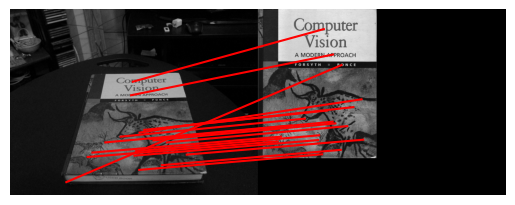

locs2 shape:  (945, 2)
locs1 shape:  (476, 2)
matches shape:  (18, 2)
shapes of cover 440 350


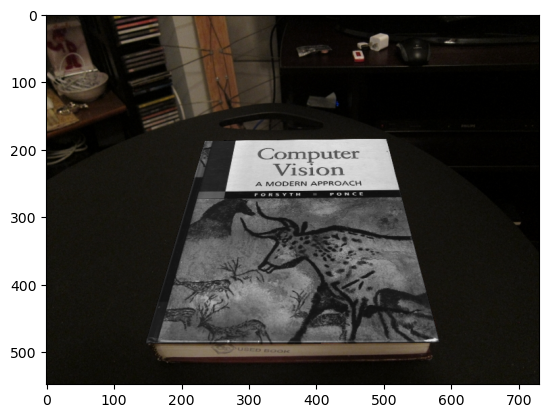

In [450]:
# defaults are:
# ratio = 0.7
# sigma = 0.15
# max_iters = 600
# inlier_tol = 1.0

# (no need to change this but can if you want to experiment)
ratio = 0.7
sigma = 0.15/255.0
max_iters = 600
inlier_tol = 1.0

warpImage(ratio, sigma, max_iters, inlier_tol)

### Q2.2.5 (10 points):

Conduct ablation study with various max_iters and inlier_tol values. Plot the result images and explain the effect of these two parameters respectively.

In [ ]:
# ===== your code here! =====
# Experiment with different max_iters and inlier_tol values.
# Include the result images in the write-up.

# ==== end of code ====

---

Explain the effect of max_iters and inlier_tol: YOUR ANSWER HERE...

---

# Q3 Create a Simple Panorama

## Q3.1 Create a panorama (10 points):

#### Implement the function createPanorama

In [ ]:
def createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol):
    """
    Create a panorama augmented reality application by computing a homography
    and stitching together a left and right image.

    Input
    -----
    left_im: left image
    right_im: right image
    ratio: ratio for BRIEF feature descriptor
    sigma: threshold for corner detection using FAST feature detector
    max_iters: the number of iterations to run RANSAC for
    inlier_tol: the tolerance value for considering a point to be an inlier

    Returns
    -------
    panorama_im: Stitched together panorama

    """

    # ===== your code here! =====
    # TODO: match features between images
    # This can be done using matchPics, cpselect, or any other function.

    # TODO: Get homography by RANSAC using computeH_ransac

    # TODO: Stich together the two images
    # Requires the use of cv2.warpPerspective
    panorama_im = None

    # ==== end of code ====

    return panorama_im.astype(np.uint8)

#### Visualize Panorama

Make sure to use **your own images** and **include them as well as the result** in the report.

In [ ]:
left_im_path = os.path.join(DATA_DIR, 'pano_left.jpg')
left_im = skimage.io.imread(left_im_path)
right_im_path = os.path.join(DATA_DIR, 'pano_right.jpg')
right_im = skimage.io.imread(right_im_path)

# Feel free to adjust as needed
ratio = 0.7
sigma = 0.15
max_iters = 600
inlier_tol = 1.0

panorama_im = createPanorama(left_im, right_im, ratio, sigma, max_iters, inlier_tol)

plt.imshow(panorama_im)
plt.axis('off')
plt.show()